# BetaNYC data test

In [1]:
import pandas as pd
import numpy as np

### Getting 311 data
We need data from the NYC Open Data [311 service requests dataset](https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9)

The full dataset is 33.6M records, but we are only interested in small segment. So we can access the records we need programatically via the API.

As a first-pass filter, we know we are interested in the Zip code area 11222.

In [2]:
# import python requests library
import requests

# we pass in zip code in request URL, and $limit parameter to pull up to 999,999 records
r = requests.get('https://data.cityofnewyork.us/resource/erm2-nwe9.json?incident_zip=11222&$limit=999999') 

r.status_code

200

In [3]:
# let's check we didn't hit max record number
len(r.json())

200023

In [4]:
# make it a dataframe
df = pd.DataFrame(r.json())

In [5]:
# show all columns
pd.set_option('display.max_columns', None)

In [6]:
df.head()

,unique_key,created_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,status,resolution_action_updated_date,community_board,borough,x_coordinate_state_plane,y_coordinate_state_plane,open_data_channel_type,park_facility_name,park_borough,latitude,longitude,location,closed_date,city,landmark,resolution_description,bbl,facility_type,due_date,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,taxi_company_borough,vehicle_type
0,58205710,2023-07-16T02:06:25.000,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11222,LORIMER STREET,LORIMER STREET,LORIMER STREET,MESEROLE AVENUE,LORIMER STREET,MESEROLE AVENUE,INTERSECTION,In Progress,2023-07-16T02:14:03.000,01 BROOKLYN,BROOKLYN,997126,204078,PHONE,Unspecified,BROOKLYN,40.72681429209436,-73.95354463697082,"{'latitude': '40.72681429209436', 'longitude':...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,58208415,2023-07-16T01:22:34.000,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11222,643 MANHATTAN AVENUE,MANHATTAN AVENUE,BEDFORD AVENUE,NORMAN AVENUE,BEDFORD AVENUE,NORMAN AVENUE,ADDRESS,Closed,2023-07-16T01:48:29.000,01 BROOKLYN,BROOKLYN,997798,203173,ONLINE,Unspecified,BROOKLYN,40.72432928364448,-73.95112194834684,"{'latitude': '40.72432928364448', 'longitude':...",2023-07-16T01:48:26.000,BROOKLYN,MANHATTAN AVENUE,The Police Department responded to the complai...,3026450029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,58211705,2023-07-16T01:14:56.000,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11222,321 NASSAU AVENUE,NASSAU AVENUE,APOLLO STREET,VAN DAM STREET,APOLLO STREET,VAN DAM STREET,ADDRESS,Closed,2023-07-16T01:44:43.000,01 BROOKLYN,BROOKLYN,1001489,203879,PHONE,Unspecified,BROOKLYN,40.72626065877065,-73.93780386922481,"{'latitude': '40.72626065877065', 'longitude':...",2023-07-16T01:44:40.000,BROOKLYN,NASSAU AVENUE,The Police Department responded to the complai...,3026620008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,58211395,2023-07-15T22:51:36.000,NYPD,New York City Police Department,Encampment,N/A,Street/Sidewalk,11222,451 MEEKER AVENUE,MEEKER AVENUE,MANHATTAN AVENUE,GRAHAM AVENUE,MANHATTAN AVENUE,GRAHAM AVENUE,ADDRESS,Closed,2023-07-16T01:04:50.000,01 BROOKLYN,BROOKLYN,999277,201400,MOBILE,Unspecified,BROOKLYN,40.71946043911757,-73.94579001814363,"{'latitude': '40.71946043911757', 'longitude':...",2023-07-16T01:04:46.000,BROOKLYN,MEEKER AVENUE,The Police Department visited the location and...,3027240024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,58211598,2023-07-15T22:50:04.000,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11222,1 BEDFORD AVENUE,BEDFORD AVENUE,MANHATTAN AVENUE,LORIMER STREET,MANHATTAN AVENUE,LORIMER STREET,ADDRESS,Closed,2023-07-16T00:59:55.000,01 BROOKLYN,BROOKLYN,997813,203054,ONLINE,Unspecified,BROOKLYN,40.72400263455818,-73.95106807164736,"{'latitude': '40.72400263455818', 'longitude':...",2023-07-16T00:59:48.000,BROOKLYN,BEDFORD AVENUE,The Police Department responded to the complai...,3026460001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We want to filter by date, but it looks like date column could be a string:

In [7]:
type(df['created_date'][0])

str

In [8]:
# convert to datetime
df['created_date'] = pd.to_datetime(df['created_date'])

In [9]:
type(df['created_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [10]:
# drop everything before earliest date we're interested in

earliest_date = pd.to_datetime('2019-01-01')

df = df[df['created_date']>= earliest_date]

In [11]:
df.created_date.min()

Timestamp('2019-01-01 00:00:00')

In [12]:
df.head()

,unique_key,created_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,status,resolution_action_updated_date,community_board,borough,x_coordinate_state_plane,y_coordinate_state_plane,open_data_channel_type,park_facility_name,park_borough,latitude,longitude,location,closed_date,city,landmark,resolution_description,bbl,facility_type,due_date,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,taxi_company_borough,vehicle_type
0,58205710,2023-07-16 02:06:25,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11222,LORIMER STREET,LORIMER STREET,LORIMER STREET,MESEROLE AVENUE,LORIMER STREET,MESEROLE AVENUE,INTERSECTION,In Progress,2023-07-16T02:14:03.000,01 BROOKLYN,BROOKLYN,997126,204078,PHONE,Unspecified,BROOKLYN,40.72681429209436,-73.95354463697082,"{'latitude': '40.72681429209436', 'longitude':...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,58208415,2023-07-16 01:22:34,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11222,643 MANHATTAN AVENUE,MANHATTAN AVENUE,BEDFORD AVENUE,NORMAN AVENUE,BEDFORD AVENUE,NORMAN AVENUE,ADDRESS,Closed,2023-07-16T01:48:29.000,01 BROOKLYN,BROOKLYN,997798,203173,ONLINE,Unspecified,BROOKLYN,40.72432928364448,-73.95112194834684,"{'latitude': '40.72432928364448', 'longitude':...",2023-07-16T01:48:26.000,BROOKLYN,MANHATTAN AVENUE,The Police Department responded to the complai...,3026450029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,58211705,2023-07-16 01:14:56,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11222,321 NASSAU AVENUE,NASSAU AVENUE,APOLLO STREET,VAN DAM STREET,APOLLO STREET,VAN DAM STREET,ADDRESS,Closed,2023-07-16T01:44:43.000,01 BROOKLYN,BROOKLYN,1001489,203879,PHONE,Unspecified,BROOKLYN,40.72626065877065,-73.93780386922481,"{'latitude': '40.72626065877065', 'longitude':...",2023-07-16T01:44:40.000,BROOKLYN,NASSAU AVENUE,The Police Department responded to the complai...,3026620008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,58211395,2023-07-15 22:51:36,NYPD,New York City Police Department,Encampment,N/A,Street/Sidewalk,11222,451 MEEKER AVENUE,MEEKER AVENUE,MANHATTAN AVENUE,GRAHAM AVENUE,MANHATTAN AVENUE,GRAHAM AVENUE,ADDRESS,Closed,2023-07-16T01:04:50.000,01 BROOKLYN,BROOKLYN,999277,201400,MOBILE,Unspecified,BROOKLYN,40.71946043911757,-73.94579001814363,"{'latitude': '40.71946043911757', 'longitude':...",2023-07-16T01:04:46.000,BROOKLYN,MEEKER AVENUE,The Police Department visited the location and...,3027240024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,58211598,2023-07-15 22:50:04,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11222,1 BEDFORD AVENUE,BEDFORD AVENUE,MANHATTAN AVENUE,LORIMER STREET,MANHATTAN AVENUE,LORIMER STREET,ADDRESS,Closed,2023-07-16T00:59:55.000,01 BROOKLYN,BROOKLYN,997813,203054,ONLINE,Unspecified,BROOKLYN,40.72400263455818,-73.95106807164736,"{'latitude': '40.72400263455818', 'longitude':...",2023-07-16T00:59:48.000,BROOKLYN,BEDFORD AVENUE,The Police Department responded to the complai...,3026460001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Filtering records by location

We can see that the dataset has a column `park_facility_name`. Let's get the list of unique values:

In [13]:
df.park_facility_name.unique()

array(['Unspecified', 'McCarren Park', 'Mccarren Pool', 'N/A',
       'American Playground', 'Msgr. McGolrick Park',
       'WNYC Transmitter Park', 'Greenpoint Landing',
       'P.S. 034 Oliver H. Perry', 'Newtown Barge Playground',
       'Sgt. William Dougherty Playground', 'Greenpoint Playground',
       'Ericsson Playground', 'P.S. 110 The Monitor',
       '61 Franklin Street Garden', 'McCarren Play Center',
       'Lentol Garden', 'ARDOR SCHOOL FOR PASSION BASED LEARN',
       'Fidelity Triangle', 'ST STANISLAUS KOSTKA CATHOLIC ACAD', 'N, A',
       "KOKO'S JUICE BAR", 'Park', 'Tanahey Playground', 'Marine Park',
       '100% Playground', 'Newtown Barge Terminal Playground',
       'Monsignor Mcgolrick Park', 'Sgt William Dougherty Playground',
       'Pool - McCarren Park', 'Recreation Center - McCarren Park',
       'School - PS 110 The Monitor'], dtype=object)

We could look only at records that are tagged with `WNYC Transmitter Park` - but this would ignore all 311 calls from *around* the park.

Instead, it might be better to use the lat/long coordinates to make a boundary boy including the park and the designated area ("between Greenpoint Ave & Kent Ave along West Street" according to brief).

We can use a free online tool to easily make a boundary box for our query.

![Bbox](bbox.png)

This yields a box with coordinates:

`-73.961484,40.729430,-73.959146,40.730515`

(Note: with a more complex shaped boundary area, it would be better to do this part in GIS software...but we can probably get away with using a rectangle here.)

In [14]:
len(df)

95143

In [15]:
longmax = -73.959146
longmin = -73.961484
latmax = 40.730515
latmin = 40.729430

In [16]:
# convert lat/long columns to float (as originally type 'string')
df['longitude'] = df['longitude'].astype(float)
df['latitude'] = df['latitude'].astype(float)

In [17]:
dftp = df[
    (df.latitude<latmax)&
    (df.latitude>latmin)&
    (df.longitude<longmax)&
    (df.longitude>longmin)
]

We now have a dataset of only the 311 complaints that occurred in our bounded area after Jan 1, 2019.

In [18]:
len(dftp)

1132

In [19]:
dftp.head()

,unique_key,created_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,status,resolution_action_updated_date,community_board,borough,x_coordinate_state_plane,y_coordinate_state_plane,open_data_channel_type,park_facility_name,park_borough,latitude,longitude,location,closed_date,city,landmark,resolution_description,bbl,facility_type,due_date,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,taxi_company_borough,vehicle_type
207,58192110,2023-07-13 12:00:00,DSNY,Department of Sanitation,Derelict Vehicles,Derelict Vehicles,Street,11222,24 KENT STREET,KENT STREET,DEAD END,WEST STREET,NaN,NaN,ADDRESS,Closed,2023-07-15T12:00:00.000,01 BROOKLYN,BROOKLYN,995248,205360,PHONE,Unspecified,BROOKLYN,40.730336,-73.960318,"{'latitude': '40.73033560313574', 'longitude':...",2023-07-15T12:00:00.000,BROOKLYN,NaN,The owner claimed the vehicle.Â Your request i...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,58178397,2023-07-12 19:32:55,DPR,Department of Parks and Recreation,Maintenance or Facility,Rodent Sighting,Park,11222,2 KENT STREET,KENT STREET,DEAD END,WEST STREET,DEAD END,WEST STREET,ADDRESS,In Progress,NaN,01 BROOKLYN,BROOKLYN,995073,205338,ONLINE,Unspecified,BROOKLYN,40.730275,-73.960950,"{'latitude': '40.73027543438651', 'longitude':...",NaN,BROOKLYN,KENT STREET,NaN,3025560041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
429,58160192,2023-07-10 15:10:31,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11222,38 KENT STREET,KENT STREET,DEAD END,WEST STREET,DEAD END,WEST STREET,ADDRESS,Closed,2023-07-10T16:24:52.000,01 BROOKLYN,BROOKLYN,995358,205373,MOBILE,Unspecified,BROOKLYN,40.730371,-73.959921,"{'latitude': '40.73037114749428', 'longitude':...",2023-07-10T16:24:46.000,BROOKLYN,KENT STREET,The Police Department responded to the complai...,3025560045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
439,58158669,2023-07-10 11:12:49,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,11222,30 KENT STREET,KENT STREET,DEAD END,WEST STREET,DEAD END,WEST STREET,ADDRESS,Closed,2023-07-10T13:38:40.000,01 BROOKLYN,BROOKLYN,995295,205365,MOBILE,Unspecified,BROOKLYN,40.730349,-73.960149,"{'latitude': '40.73034926834678', 'longitude':...",2023-07-10T13:38:35.000,BROOKLYN,KENT STREET,The Police Department responded to the complai...,3025560045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
455,58156340,2023-07-10 09:59:00,DEP,Department of Environmental Protection,Noise,Noise: Alarms (NR3),NaN,11222,44 KENT STREET,KENT STREET,BODY OF WATER,WEST ST,NaN,NaN,ADDRESS,Closed,2023-07-10T13:49:00.000,01 BROOKLYN,BROOKLYN,995402,205379,ONLINE,Unspecified,BROOKLYN,40.730388,-73.959763,"{'latitude': '40.73038756065853', 'longitude':...",2023-07-10T13:49:00.000,BROOKLYN,NaN,The Department of Environmental Protection res...,3025560058,N/A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Categorising complaints

In [20]:
# lets make two dataframes for the specific windows in question
df19 = dftp[dftp.created_date<'2019-07-01'].copy()
           
df23 = dftp[(dftp.created_date>='2023-01-01')&(dftp.created_date<'2023-07-01')].copy()

In [21]:
print(f"Number of complaints Q1 + Q2 2019: {len(df19)}")
print(f"Number of complaints Q1 + Q2 2023: {len(df23)}")

Number of complaints Q1 + Q2 2019: 38
Number of complaints Q1 + Q2 2023: 125


So, as an initial observation we can see that there were roughly 3x more complaints in 2023!


For each group, we can now make a simple list of complaints by type. 

We will group the data by the two columns that explain the complaint (`complaint_type` and `descriptor`) and then sum the totals.

In [22]:
# 2019 Q1+2:
df19.groupby(['complaint_type','descriptor']).size().sort_values(ascending=False)

complaint_type                       descriptor                                           
Noise - Vehicle                      Car/Truck Music                                          7
Request Large Bulky Item Collection  Request Large Bulky Item Collection                      4
Illegal Parking                      Blocked Bike Lane                                        3
Animal in a Park                     Dog Off Leash                                            2
Street Condition                     Pothole                                                  2
Missed Collection (All Materials)    1 Missed Collection                                      2
Plumbing                             Failure To Retain Water/Improper Drainage- (LL103/89)    1
Street Light Condition               Street Light Out                                         1
                                     Lamppost Damaged                                         1
Street Condition                     Rough, P

In [23]:
# 2023 Q1+2:
df23.groupby(['complaint_type','descriptor']).size().sort_values(ascending=False)

complaint_type                 descriptor                                     
Illegal Parking                Blocked Bike Lane                                  20
Noise - Street/Sidewalk        Loud Music/Party                                   15
Maintenance or Facility        Rodent Sighting                                     8
Noise - Residential            Loud Music/Party                                    7
Illegal Parking                Posted Parking Sign Violation                       5
Dirty Condition                Trash                                               5
Noise - Vehicle                Car/Truck Music                                     5
Noise                          Noise: Jack Hammering (NC2)                         4
Animal in a Park               Dog Off Leash                                       4
Noise - Commercial             Loud Talking                                        4
Maintenance or Facility        Grass/Weeds                             

---
From this we can pull out some quick observations, like the fact that in 2023 the most common complaint was over blocked bike lanes, and second most common was noise complaints for music and parties. 

In fact, we can see that there are two related categories for complaints over`Loud Music/Party`, one filed as a Residential complaint and one as a Street/Sidewalk complaint. If we group these two together, `Loud Music/Party` is the most common type of 311 complaint in this area in Q1-Q2 2023. Interestingly, there were 0 noise complaints about music/parties during the same time window in 2019.

Note: A data-driven investigation by BuzzFeed News found that [noise-related 311 complaints increase as areas gentrify](https://www.buzzfeednews.com/article/lamvo/gentrification-complaints-311-new-york). Could this account for part of the change?

## Categorizing complaints

The brief tells us that our requesting agency is most interested in complaints related to *noise*, *trash* and *calls for park maintenance*:

```
Noise = loud music, illegal parties, late business hours
Trash = illegal dumping, overflowing trash cans, rats
Calls for parks maintenance = trash, dead trees, dead grass, broken benches, broken playground equipment, etc...
```

To sort our data by these broad categories, we need to be able to classify each complaint as one of them (or none).

In [24]:
# Create a list of all 'descriptor' codes corresponding to trash complaints
# (excluding codes that fall within park maintenance remit)

trash_codes = ['Trash',
        '1 Missed Collection',
        '2 Bulk-Missed Collection',
       'Recycling - Paper'
        'Rat sighting',
        'Signs of Rodents']

In [25]:
# Check we're finding trash complaints
df19[df19.descriptor.isin(trash_codes)]

,unique_key,created_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,status,resolution_action_updated_date,community_board,borough,x_coordinate_state_plane,y_coordinate_state_plane,open_data_channel_type,park_facility_name,park_borough,latitude,longitude,location,closed_date,city,landmark,resolution_description,bbl,facility_type,due_date,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,taxi_company_borough,vehicle_type
86427,43159583,2019-06-30 08:49:00,DSNY,Department of Sanitation,Missed Collection (All Materials),1 Missed Collection,Sidewalk,11222,27 GREENPOINT AVENUE,GREENPOINT AVENUE,DEAD END,WEST STREET,NaN,NaN,ADDRESS,Closed,2019-07-05T12:00:00.000,01 BROOKLYN,BROOKLYN,995434,205125,PHONE,Unspecified,BROOKLYN,40.729690,-73.959647,"{'latitude': '40.72969035246403', 'longitude':...",2019-07-05T12:00:00.000,BROOKLYN,NaN,The Department of Sanitation investigated this...,3025560052,DSNY Garage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88084,42831004,2019-05-31 13:12:00,DSNY,Department of Sanitation,Missed Collection (All Materials),1 Missed Collection,Sidewalk,11222,19 GREENPOINT AVENUE,GREENPOINT AVENUE,DEAD END,WEST STREET,NaN,NaN,ADDRESS,Closed,2019-06-06T12:00:00.000,01 BROOKLYN,BROOKLYN,995363,205116,PHONE,Unspecified,BROOKLYN,40.729666,-73.959904,"{'latitude': '40.72966573915436', 'longitude':...",2019-06-06T12:00:00.000,BROOKLYN,NaN,The Department of Sanitation investigated this...,3025560048,DSNY Garage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88198,42817751,2019-05-29 18:52:00,DSNY,Department of Sanitation,Missed Collection (All Materials),2 Bulk-Missed Collection,Sidewalk,11222,21 GREENPOINT AVENUE,GREENPOINT AVENUE,DEAD END,WEST STREET,NaN,NaN,ADDRESS,Closed,2019-06-04T12:00:00.000,01 BROOKLYN,BROOKLYN,995381,205119,PHONE,Unspecified,BROOKLYN,40.729674,-73.959839,"{'latitude': '40.72967395078706', 'longitude':...",2019-06-04T12:00:00.000,BROOKLYN,NaN,The Department of Sanitation investigated this...,3025560049,DSNY Garage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# Check we're finding noise complaints
df19[df19.complaint_type.str.contains("Noise")].head(5)

,unique_key,created_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,status,resolution_action_updated_date,community_board,borough,x_coordinate_state_plane,y_coordinate_state_plane,open_data_channel_type,park_facility_name,park_borough,latitude,longitude,location,closed_date,city,landmark,resolution_description,bbl,facility_type,due_date,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,taxi_company_borough,vehicle_type
88052,42827233,2019-06-01 01:23:11,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Music,Street/Sidewalk,11222,44 KENT STREET,KENT STREET,BODY OF WATER,WEST STREET,NaN,NaN,ADDRESS,Closed,2019-06-01T01:33:37.000,01 BROOKLYN,BROOKLYN,995402,205379,PHONE,Unspecified,BROOKLYN,40.730388,-73.959763,"{'latitude': '40.73038756065853', 'longitude':...",2019-06-01T01:33:36.000,BROOKLYN,NaN,Your request can not be processed at this time...,3025560058,Precinct,2019-06-01T09:23:11.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88053,42826877,2019-06-01 01:13:40,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Music,Street/Sidewalk,11222,44 KENT STREET,KENT STREET,BODY OF WATER,WEST STREET,NaN,NaN,ADDRESS,Closed,2019-06-01T03:41:54.000,01 BROOKLYN,BROOKLYN,995402,205379,PHONE,Unspecified,BROOKLYN,40.730388,-73.959763,"{'latitude': '40.73038756065853', 'longitude':...",2019-06-01T03:41:54.000,BROOKLYN,NaN,The Police Department responded to the complai...,3025560058,Precinct,2019-06-01T09:13:40.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88054,42831383,2019-06-01 01:12:56,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Music,Street/Sidewalk,11222,NaN,NaN,NaN,NaN,WEST STREET,KENT STREET,INTERSECTION,Closed,2019-06-01T01:32:34.000,01 BROOKLYN,BROOKLYN,995514,205396,PHONE,Unspecified,BROOKLYN,40.730434,-73.959358,"{'latitude': '40.73043407957448', 'longitude':...",2019-06-01T01:32:34.000,BROOKLYN,NaN,Your request can not be processed at this time...,NaN,Precinct,2019-06-01T09:12:56.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88411,42776692,2019-05-25 03:28:04,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Music,Street/Sidewalk,11222,NaN,NaN,NaN,NaN,KENT STREET,WEST STREET,INTERSECTION,Closed,2019-05-25T07:24:11.000,01 BROOKLYN,BROOKLYN,995514,205396,PHONE,Unspecified,BROOKLYN,40.730434,-73.959358,"{'latitude': '40.73043407957448', 'longitude':...",2019-05-25T07:24:11.000,BROOKLYN,NaN,The Police Department responded to the complai...,NaN,Precinct,2019-05-25T11:28:04.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89581,42587392,2019-05-04 21:20:21,NYPD,New York City Police Department,Noise - Park,Loud Talking,Park/Playground,11222,NaN,NaN,NaN,NaN,KENT STREET,WEST STREET,INTERSECTION,Closed,2019-05-05T01:06:28.000,01 BROOKLYN,BROOKLYN,995514,205396,PHONE,Unspecified,BROOKLYN,40.730434,-73.959358,"{'latitude': '40.73043407957448', 'longitude':...",2019-05-05T01:06:28.000,BROOKLYN,NaN,The Police Department responded to the complai...,NaN,Precinct,2019-05-05T05:20:21.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# We will assume that every request for parks maintenance is correctly labelled with location_type: Park,
# and has a complaint_type other than "Animal in a Park" (which is not a maintenance request)

df19[(df19.location_type=='Park')&(df19.complaint_type!="Animal in a Park")]

,unique_key,created_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,status,resolution_action_updated_date,community_board,borough,x_coordinate_state_plane,y_coordinate_state_plane,open_data_channel_type,park_facility_name,park_borough,latitude,longitude,location,closed_date,city,landmark,resolution_description,bbl,facility_type,due_date,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,taxi_company_borough,vehicle_type
87817,42879585,2019-06-05 12:07:54,DPR,Department of Parks and Recreation,Maintenance or Facility,Structure - Outdoors,Park,11222,NaN,NaN,NaN,NaN,GREENPOINT AVENUE,WEST STREET,INTERSECTION,Closed,2019-06-06T09:33:42.000,01 BROOKLYN,BROOKLYN,995546,205137,PHONE,Unspecified,BROOKLYN,40.729723,-73.959243,"{'latitude': '40.72972314720472', 'longitude':...",2019-06-06T09:33:42.000,BROOKLYN,NaN,Upon inspection the reported condition was not...,NaN,N/A,2019-06-19T12:07:54.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93529,41629304,2019-02-06 11:03:16,DPR,Department of Parks and Recreation,Maintenance or Facility,Broken Glass,Park,11222,NaN,NaN,NaN,NaN,GREENPOINT AVENUE,WEST STREET,INTERSECTION,Closed,2019-03-06T10:03:50.000,01 BROOKLYN,BROOKLYN,995546,205137,PHONE,WNYC Transmitter Park,BROOKLYN,40.729723,-73.959243,"{'latitude': '40.72972314720472', 'longitude':...",2019-03-06T10:03:50.000,BROOKLYN,NaN,The Department of Parks and Recreation has com...,NaN,N/A,2019-02-09T11:03:16.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# Write a function that checks each of the tests we performed above 
# and returns the appropriate category name for each one

def categorize_complaint(row):
    if row['descriptor'] in (trash_codes):
        return "Trash"
    elif "Noise" in row['complaint_type']:
        return "Noise"
    elif (row.location_type=='Park')&(row.complaint_type!="Animal in a Park"):
        return "Maintenance"
    else:
        return "Other"

In [29]:
# Apply that function to each row to create a new category

df23['Category'] = df23.apply(lambda row: categorize_complaint(row),axis=1)

df19['Category'] = df19.apply(lambda row: categorize_complaint(row),axis=1)

In [30]:
# import Seaborn library for basic chart styling
import seaborn as sns

sns.set()

In [31]:
df23['Category'].value_counts()

Other          54
Noise          45
Maintenance    20
Trash           6
Name: Category, dtype: int64

<AxesSubplot: title={'center': 'Transmitter Park 311 complaint types, Q1+Q2'}>

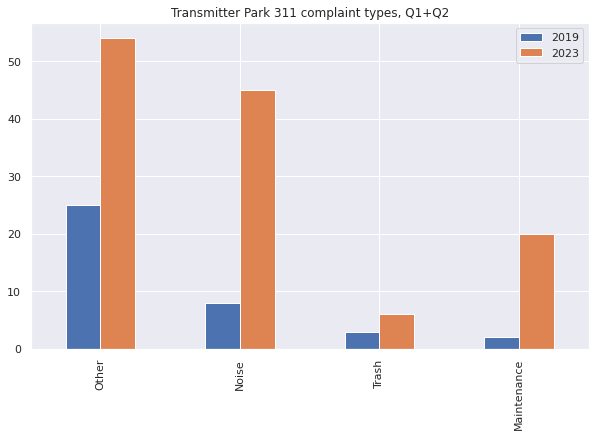

In [32]:
pd.concat([
        df19['Category'].value_counts().rename('2019'),
        df23['Category'].value_counts().rename('2023')
],axis=1).plot(kind='bar',
             title='Transmitter Park 311 complaint types, Q1+Q2',
            figsize=(10,6))

## 311 complaint heatmap

In [33]:
# Combine two dataframes with lat/long columns

pd.concat(
    [
        df19[['longitude','latitude']],
        df23[['longitude','latitude']],
    ]
)

,longitude,latitude
86426,-73.959647,40.729690
86427,-73.959647,40.729690
86584,-73.960058,40.730360
86721,-73.960177,40.730349
86723,-73.959521,40.729704
...,...,...
13649,-73.960030,40.729655
13822,-73.960152,40.730366
13843,-73.960950,40.730275
13953,-73.959763,40.730388


In [34]:
latlong = pd.concat(
    [
        df19[['longitude','latitude']],
        df23[['longitude','latitude']],
    ]
)

The ipyleaflet library takes a list of lat/long pairs. So we need to make each column of our lat/long dataframe into a long list, then zip the two together.
(Because of how ipyleaflet works we also create another arbitrary 'strength' value, in this case 10, to go with the list)

In [35]:
latlongzip = zip(latlong['latitude'].to_list(),latlong['longitude'].to_list(), [10] * len(latlong))

In [36]:
from ipyleaflet import Map, Heatmap
m = Map(center=(40.729862,-73.9605), zoom=18)

heatmap = Heatmap(
    locations=list(latlongzip),
    radius=12
)

m.add_layer(heatmap);

display(m)

Map(center=[40.729862, -73.9605], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', …

This heatmap does give us some insight – like the fact that the highest proportion of the complaints are clustered along Greenpoint Avenue at the end nearest to the park. 

Having written the code, we could then re-run this technique for different dates &/or types of complaint to see how they are distributed on the map (or even on a much bigger map of the borough or the city as a whole).